In [57]:
import  pandas as pd
import numpy as  np
import os
os.chdir(r"/home/javemar/Documents/udemy/Python for Time Series/Course Resources/UDEMY-TSA-FINAL/UDEMY_TSA_FINAL/03-Pandas-Visualization"
    )
from datetime import datetime
%matplotlib inline

## Times  in python

In [3]:
my_date  = datetime(2020,  1, 2, 0)

In [4]:
my_date

datetime.datetime(2020, 1, 2, 0, 0)

In [5]:
type(my_date)

datetime.datetime

in Python the type is datetime, while in numpy is datetime64

## Numpy times

Use 'dtype' argument to create dates with the  value "datetime64". If you want to  specify the interval put a  e string code inside a squere parentesis: [D] [Y],etc 

In [8]:
np.array(["2010-10-11","2010-10-12","2010-10-13","2010-10-14"])

array(['2010-10-11', '2010-10-12', '2010-10-13', '2010-10-14'],
      dtype='|S10')

In [9]:
np.array(["2010-10-11","2010-10-12","2010-10-13","2010-10-14"], dtype='datetime64')

array(['2010-10-11', '2010-10-12', '2010-10-13', '2010-10-14'],
      dtype='datetime64[D]')

In [11]:
np.array(["2010-10-11","2010-10-12","2010-10-13","2010-10-14"], dtype='datetime64[Y]')

array(['2010', '2010', '2010', '2010'], dtype='datetime64[Y]')

In [13]:
np.array(["2010-10-11","2010-10-12","2010-10-13","2010-10-14"], dtype='datetime64[m]')

array(['2010-10-11T00:00', '2010-10-12T00:00', '2010-10-13T00:00',
       '2010-10-14T00:00'], dtype='datetime64[m]')

In [15]:
np.arange(0,  10, 2)

array([0, 2, 4, 6, 8])

In [24]:
np.arange("2018-06-01", "2018-12-23", 1, dtype= "datetime64[h]")

array(['2018-06-01T00', '2018-06-01T01', '2018-06-01T02', ...,
       '2018-12-22T21', '2018-12-22T22', '2018-12-22T23'],
      dtype='datetime64[h]')

In [26]:
np.arange("1996", "2018", 1, dtype= "datetime64[Y]")

array(['1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017'],
      dtype='datetime64[Y]')

## Pandas datetime

In [27]:
pd.date_range(start="2020-01-01", periods=7,  freq="D")

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')

In [31]:
pd.date_range(start="Jan 01, 2018", periods=7,  freq="D")

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07'],
              dtype='datetime64[ns]', freq='D')

In [32]:
pd.to_datetime(["1/2/2018",  "Jan 03,  2018"])

DatetimeIndex(['2018-01-02', '2018-01-03'], dtype='datetime64[ns]', freq=None)

In [35]:
pd.to_datetime(["1/2/2018",  "3/1/2019"], format="%d/%m/%Y")

DatetimeIndex(['2018-02-01', '2019-01-03'], dtype='datetime64[ns]', freq=None)

In [39]:
data = np.random.randn(3,2)
cols = ["A","B"]
idx =  pd.date_range("2020-01-01", periods=3, freq="D")
df = pd.DataFrame(data,  index=idx,columns=cols)
df

,A,B
2020-01-01,-1.056694,-0.361244
2020-01-02,0.193632,2.198861
2020-01-03,-1.785717,0.217461


In [40]:
df.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03'], dtype='datetime64[ns]', freq='D')

In [41]:
df.index.max(), df.index.argmax()

(Timestamp('2020-01-03 00:00:00', freq='D'), 2)

## Time  Resampling

It's like a group by  operation but  instead to group by a category,  we group by a time frequency

In [42]:
os.chdir("/home/javemar/Documents/udemy/Python for Time Series/Course Resources/UDEMY-TSA-FINAL/UDEMY_TSA_FINAL/Data")

In [43]:
df = pd.read_csv("starbucks.csv")

In [45]:
df.head()

,Date,Close,Volume
0,2015-01-02,38.0061,6906098
1,2015-01-05,37.2781,11623796
2,2015-01-06,36.9748,7664340
3,2015-01-07,37.8848,9732554
4,2015-01-08,38.4961,13170548


In [46]:
df = pd.read_csv("starbucks.csv",  index_col="Date")

In [48]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [49]:
df.index#is not a date index

Index([u'2015-01-02', u'2015-01-05', u'2015-01-06', u'2015-01-07',
       u'2015-01-08', u'2015-01-09', u'2015-01-12', u'2015-01-13',
       u'2015-01-14', u'2015-01-15',
       ...
       u'2018-12-17', u'2018-12-18', u'2018-12-19', u'2018-12-20',
       u'2018-12-21', u'2018-12-24', u'2018-12-26', u'2018-12-27',
       u'2018-12-28', u'2018-12-31'],
      dtype='object', name=u'Date', length=1006)

In [50]:
df = pd.read_csv("starbucks.csv",  index_col="Date", parse_dates=True)
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name=u'Date', length=1006, freq=None)

In [51]:
#resample data to be yearly data
df.resample(rule="A")

DatetimeIndexResampler [freq=<YearEnd: month=12>, axis=0, closed=right, label=right, convention=start, base=0]

In [52]:
#you need to tell  python  what is  the aggretation formula
df.resample(rule="A").mean()

,Close,Volume
Date,,
2015-12-31,50.078100,8.649190e+06
2016-12-31,53.891732,9.300633e+06
2017-12-31,55.457310,9.296078e+06
2018-12-31,56.870005,1.122883e+07


We can specify a  custome  function

In [53]:
def first_day(dates):
    if  len(dates)>0:
        return dates[0]

df.resample(rule="A").apply(first_day)

,Close,Volume
Date,,
2015-12-31,38.0061,6906098
2016-12-31,55.0780,13521544
2017-12-31,53.1100,7809307
2018-12-31,56.3243,7215978


In [55]:
def first_day(dates):
    if  len(dates)>0:
        return dates.sort_index()[0]

df.resample(rule="A").apply(first_day)

,Close,Volume
Date,,
2015-12-31,38.0061,6906098
2016-12-31,55.0780,13521544
2017-12-31,53.1100,7809307
2018-12-31,56.3243,7215978


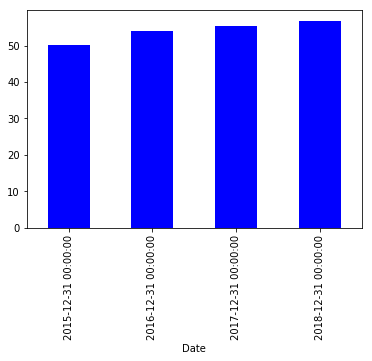

In [62]:
df.Close.resample("A").mean().plot.bar(color="blue");

## Time Shifting

In [63]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [64]:
df.tail()

,Close,Volume
Date,,
2018-12-24,60.56,6323252
2018-12-26,63.08,16646238
2018-12-27,63.20,11308081
2018-12-28,63.39,7712127
2018-12-31,64.40,7690183


In [67]:
df.shift(1).tail()# shift  the  data one row

,Close,Volume
Date,,
2018-12-24,61.39,23524888.0
2018-12-26,60.56,6323252.0
2018-12-27,63.08,16646238.0
2018-12-28,63.20,11308081.0
2018-12-31,63.39,7712127.0


In [68]:
df.shift(-1).tail()

,Close,Volume
Date,,
2018-12-24,63.08,16646238.0
2018-12-26,63.20,11308081.0
2018-12-27,63.39,7712127.0
2018-12-28,64.40,7690183.0
2018-12-31,NaN,NaN


In [69]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [71]:
df.shift(periods=1,  freq="M").head()

,Close,Volume
Date,,
2015-01-31,38.0061,6906098
2015-01-31,37.2781,11623796
2015-01-31,36.9748,7664340
2015-01-31,37.8848,9732554
2015-01-31,38.4961,13170548


## Rolling and Expanding

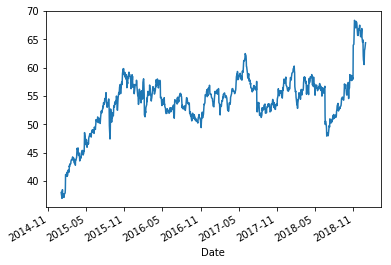

In [73]:
df.Close.plot()

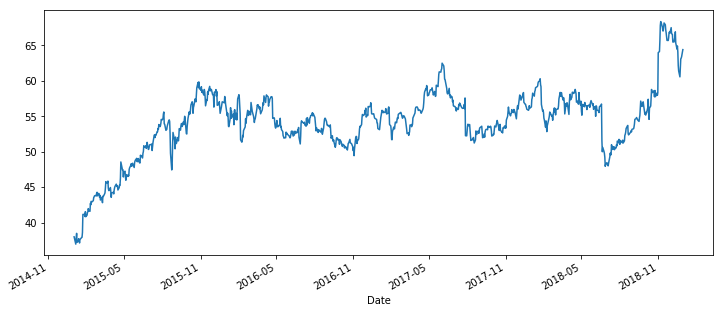

In [74]:
df.Close.plot(figsize=(12,5))

In [76]:

df.rolling(window=7).mean().head(20)

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,NaN,NaN
2015-01-06,NaN,NaN
2015-01-07,NaN,NaN
2015-01-08,NaN,NaN
2015-01-09,NaN,NaN
2015-01-12,37.616786,1.238222e+07
2015-01-13,37.578786,1.297288e+07
2015-01-14,37.614786,1.264020e+07


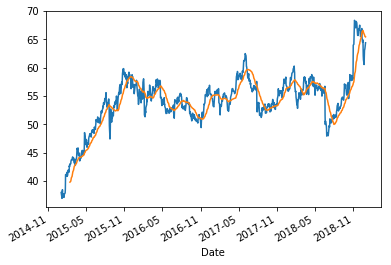

In [78]:
df.Close.plot()
df.Close.rolling(window=30).mean().plot()

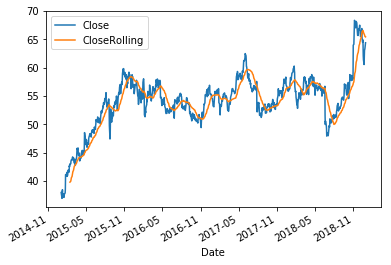

In [79]:

df["CloseRolling"] = df.Close.rolling(window=30).mean()
df[["Close", "CloseRolling"]].plot()

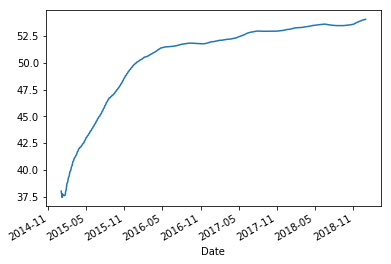

In [80]:
df.Close.expanding().mean().plot()